In [1]:
import numpy as np, matplotlib.pyplot as plt
from sigpyproc.Readers import FilReader
from scipy.signal import savgol_filter, resample, correlate
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
import numpy as np
from lmfit import minimize, Parameters, fit_report, Model
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['cmr10']
rcParams['font.size'] = 16
rcParams['axes.formatter.use_mathtext'] = True
rcParams['axes.unicode_minus'] = False
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.usetex'] = False

In [2]:
def dedisperse_dep(data,dm,fch1=1498.75,reffreq=1530.,nf=6144,df=0.03051757812,nt=32768,dt=32.768e-3):
    """
    incoherent dedispersion (V. Ravi)
    """
    # calculate number of samples in output
    delay = 4.15*dm*((1e-3*(fch1-(nf-1)*df))**(-2.) - (1e-3*reffreq)**(-2.))
    nsamp_delay = int(delay/dt)-1
    print(f'Nsamp Delay: {nsamp_delay}')
    nsamp_output = nt-nsamp_delay
    print('outputting samples:',nsamp_output)
    
    # form output
    output_data = np.zeros((nf,nsamp_output))
    for i in np.arange(nf):
        
        f = 1e-3*(fch1-i*df)
        delay_samples = 4.15*dm*(f**(-2.) - (1e-3*reffreq)**(-2.))/dt
        x = np.arange(nsamp_output)+delay_samples
        xp = np.arange(nt)
        fp = data[i,:]
        #print(len(xp), len(fp))
        output_data[i,:] = np.interp(x,xp,fp)
        
    return output_data

In [4]:
fl = './gold/dsa_fits/240229aaad_casey/240229aaad_dev_polcal_I.fil'

data = FilReader(fl).readBlock(0, 17120)
# All relevant info can be found in the header
#for key, value in data.header.items():
#    print(f"{key}: {value}")

freq_dsa = np.linspace(1498.75, 1311.25, 6144)
data_arr = np.array(data)

Phase Offset: 0.500006912


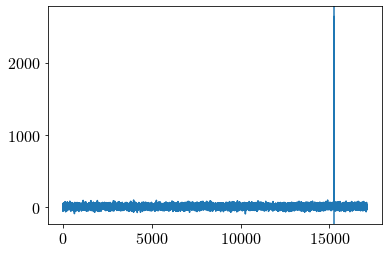

In [12]:
timeseries_dsa_bpc = np.nansum(data_arr, axis = 0)
peak = np.argmax(timeseries_dsa_bpc)
print(f'Phase Offset: {peak * 3.2768e-05}')

fig = plt.figure()
plt.plot(timeseries_dsa_bpc)
plt.axvline(peak)
plt.show()

In [5]:
# Undo dedispersion

data_arr_disp = dedisperse_dep(data_arr, -491.15, nt=17120)

Nsamp Delay: -9604
outputting samples: 26724


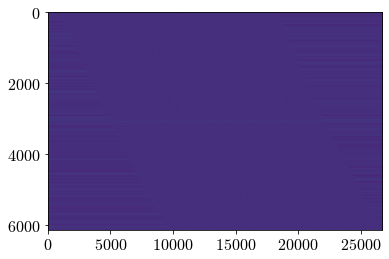

In [6]:
plt.imshow(data_arr_disp, aspect = 'auto')

In [21]:
def dedisperse(data,dm,fch1=1498.75,reffreq=1530,nf=6144,df=0.03051757812,nt=32768,dt=32.768e-3):
    """
    incoherent dedispersion (V. Ravi)
    """
    # calculate number of samples in output
    delay = 4.149377593360996*dm*((1e-3*(fch1-(nf-1)*df))**(-2.) - (1e-3*reffreq)**(-2.))
    nsamp_delay = int(delay/dt)-1
    print(f'Nsamp Delay: {nsamp_delay}')
    nsamp_output = nt-nsamp_delay
    print('outputting samples:',nsamp_output)
    
    # form output
    output_data = np.zeros((nf,nsamp_output))
    for i in np.arange(nf):
        
        f = 1e-3*(fch1-i*df)
        delay_samples = 4.149377593360996*dm*(f**(-2.) - (1e-3*reffreq)**(-2.))/dt
        x = np.arange(nsamp_output)+delay_samples
        xp = np.arange(nt)
        fp = data[i,:]
        output_data[i,:] = np.interp(x,xp,fp)
        
    return output_data, nsamp_output

In [82]:
dm_range = np.arange(490.55, 491.55, 0.004040404040404*12.8)
print(dm_range.shape)

(20,)


Nsamp Delay: 9589
outputting samples: 17137


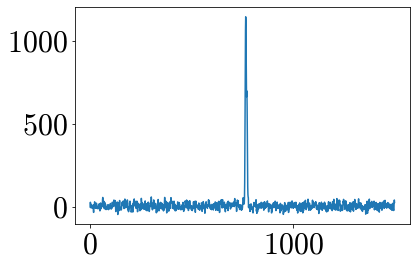

Nsamp Delay: 9590
outputting samples: 17136


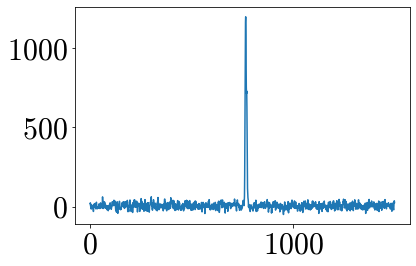

Nsamp Delay: 9591
outputting samples: 17135


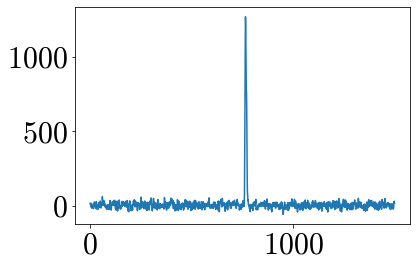

Nsamp Delay: 9592
outputting samples: 17134


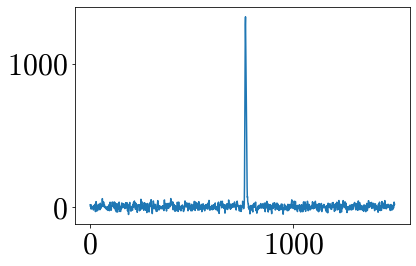

Nsamp Delay: 9593
outputting samples: 17133


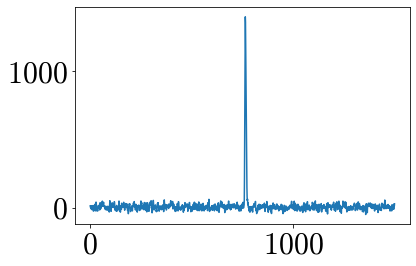

Nsamp Delay: 9594
outputting samples: 17132


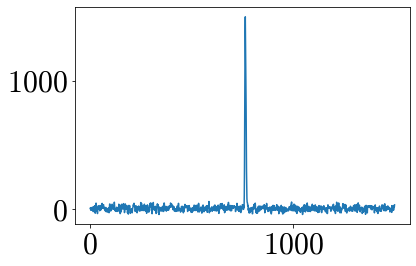

Nsamp Delay: 9595
outputting samples: 17131


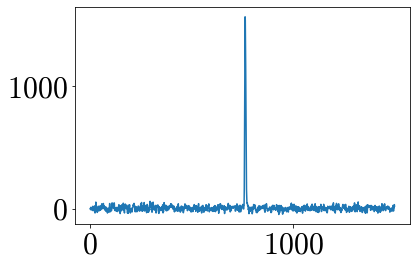

Nsamp Delay: 9596
outputting samples: 17130


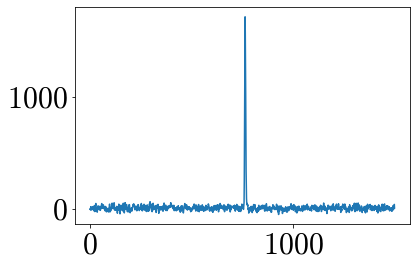

Nsamp Delay: 9597
outputting samples: 17129


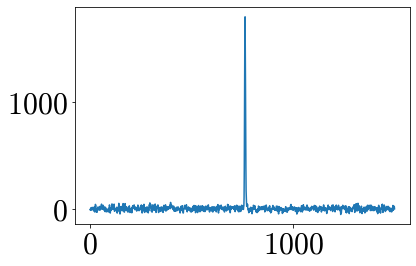

Nsamp Delay: 9598
outputting samples: 17128


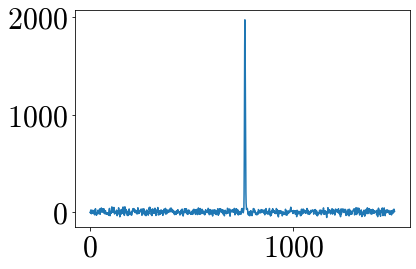

Nsamp Delay: 9599
outputting samples: 17127


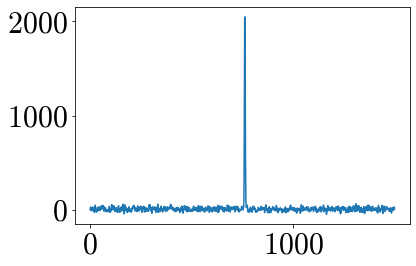

Nsamp Delay: 9600
outputting samples: 17126


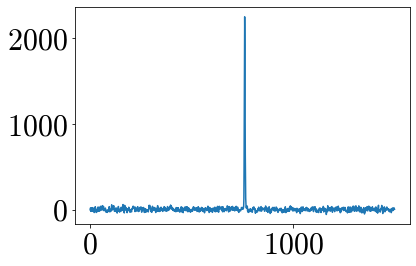

Nsamp Delay: 9601
outputting samples: 17125


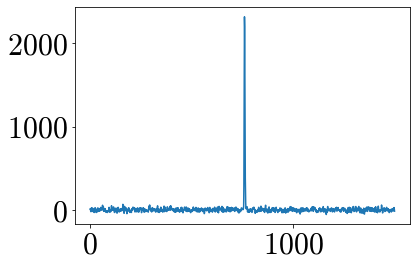

Nsamp Delay: 9602
outputting samples: 17124


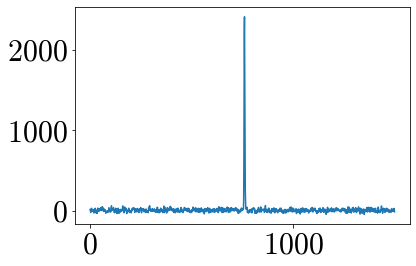

Nsamp Delay: 9603
outputting samples: 17123


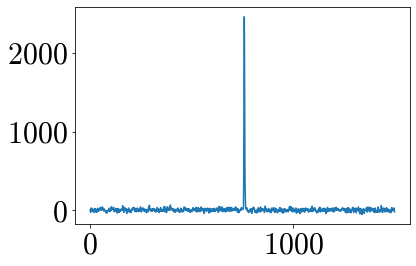

Nsamp Delay: 9604
outputting samples: 17122


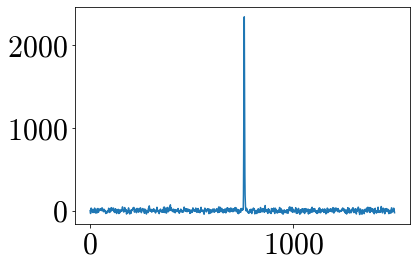

Nsamp Delay: 9605
outputting samples: 17121


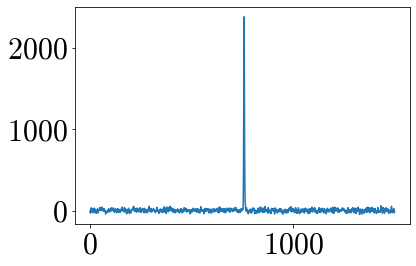

Nsamp Delay: 9606
outputting samples: 17120


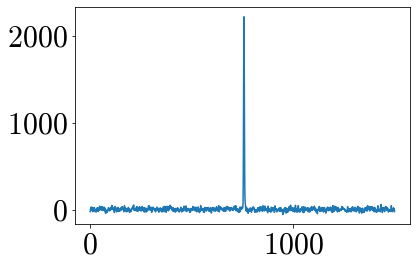

Nsamp Delay: 9607
outputting samples: 17119


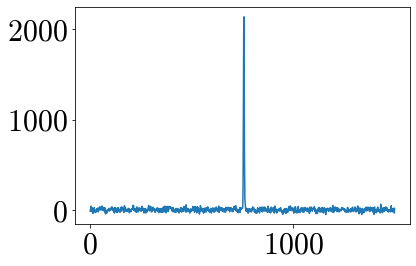

Nsamp Delay: 9608
outputting samples: 17118


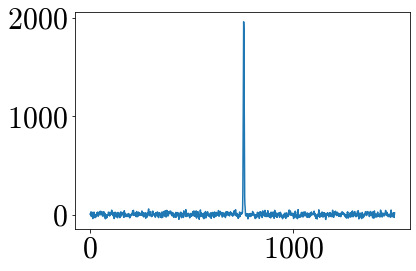

In [83]:
dm_time_arr = np.zeros((20, 1500))
output_samples = []
n = 0
for i in dm_range:
    data_arr_dedisp, nsamp_output = dedisperse(data_arr_disp, i, nt=26726)
    output_samples.append(nsamp_output)
    timeseries = np.nansum(data_arr_dedisp, axis = 0)
    timeseries = timeseries[14500:16000]
    plt.plot(timeseries)
    plt.show()
    #timeseries = timeseries[:17100]
    dm_time_arr[n, :] = timeseries
    n += 1

In [92]:
80 * 32.768e-3

2.6214399999999998

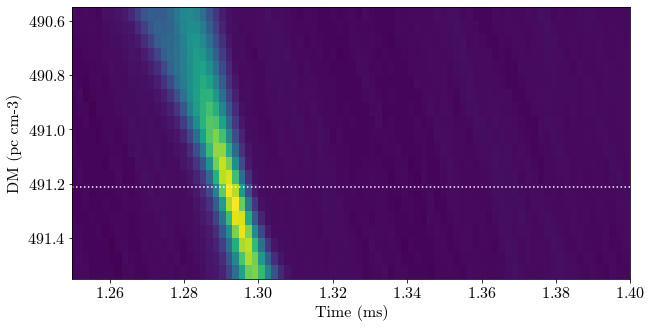

In [121]:
fig = plt.figure(figsize = (10, 5))
mean = np.nanmean(dm_time_arr)
std = np.nanstd(dm_time_arr)
plt.imshow(np.flip(dm_time_arr, axis = 1), aspect = 'auto', extent = [0, 2.621, 491.55, 490.55])
plt.axhline(491.213, c = 'w', linestyle = 'dotted')
plt.xlim(1.25, 1.4)
plt.xlabel('Time (ms)')
plt.ylabel('DM (pc cm-3)')
plt.show()

In [30]:
timeseries = np.nansum(data_arr_dedisp, axis = 0)

In [22]:
data_arr_dedisp, nsamp_output = dedisperse(data_arr_disp, 491.211, nt=26724)
I = data_arr_dedisp
#I = I[:, 15250:15300]

Nsamp Delay: 9602
outputting samples: 17122


In [ ]:
plt.plot(np.nansum(I, axis = 0))

In [19]:
fig = plt.figure(figsize = (10, 10))
mean = np.nanmean(I)
std = np.nanstd(I)
#plt.imshow(I*rfi_channels[:, None], aspect = 'auto', vmin = mean - 3*std, vmax = mean + 3*std)
plt.imshow(I, aspect = 'auto', vmin = mean - 3*std, vmax = mean + 3*std, cmap = 'plasma')
#plt.xlim(time_limits[0], time_limits[1])
plt.show()


KeyboardInterrupt



In [ ]:
plt.plot(timeseries[15000:15500])
plt.show()

Phase Offset: 0.500006912


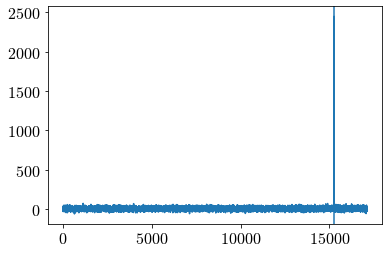

In [11]:
timeseries_dsa_bpc = np.nansum(data_arr_dedisp, axis = 0)
peak = np.argmax(timeseries_dsa_bpc)
print(f'Phase Offset: {peak * 3.2768e-05}')

fig = plt.figure()
plt.plot(timeseries_dsa_bpc)
plt.axvline(peak)
plt.show()